<a href="https://colab.research.google.com/github/Savio-Jos3/Major-Pro/blob/main/ANN_Evacuation_Route_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Simulated Threat Detected at: (np.int64(5), np.int64(9))
Simulated Threat Detected at: (np.int64(0), np.int64(2))
Simulated Threat Detected at: (np.int64(0), np.int64(4))
Simulated Threat Detected at: (np.int64(7), np.int64(5))
Simulated Threat Detected at: (np.int64(3), np.int64(0))
Simulated Threat Detected at: (np.int64(8), np.int64(0))
Simulated Threat Detected at: (np.int64(9), np.int64(1))
Simulated Threat Detected at: (np.int64(6), np.int64(3))
Simulated Threat Detected at: (np.int64(0), np.int64(8))
Simulated Threat Detected at: (np.int64(9), np.int64(0))
Simulated Threat Detected at: (np.int64(3), np.int64(5))
Simulated Threat Detected at: (np.int64(5), np.int64(7))
Simulated Threat Detected at: (np.int64(3), np.int64(1))
Simulated Threat Detected at: (np.int64(6), np.int64(9))
Simulated Threat Detected at: (np.int64(7), np.int64(0))
Simulated Threat Detected at: (np.int64(9), np.int64(5))
Simulated Threat Detected at: (np.int

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,340 (165.39 KB)

 Trainable params: 42,340 (165.39 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the ANN Model ---
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4174 - loss: 0.4394 - val_accuracy: 0.9245 - val_loss: 0.1247
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8613 - loss: 0.1072 - val_accuracy: 0.7995 - val_loss: 0.0683
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.0558 - val_accuracy: 0.6869 - val_loss: 0.0407
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6303 - loss: 0.0299 - val_accuracy: 0.5730 - val_loss: 0.0249
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6071 - loss: 0.0195 - val_accuracy: 0.5879 - val_loss: 0.0193
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5740 - loss: 0.0156 - val_accuracy: 0.6287 - val_loss: 0.0154
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.0088 - val_accuracy: 0.6498 - val_loss: 0.0132
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6655 -

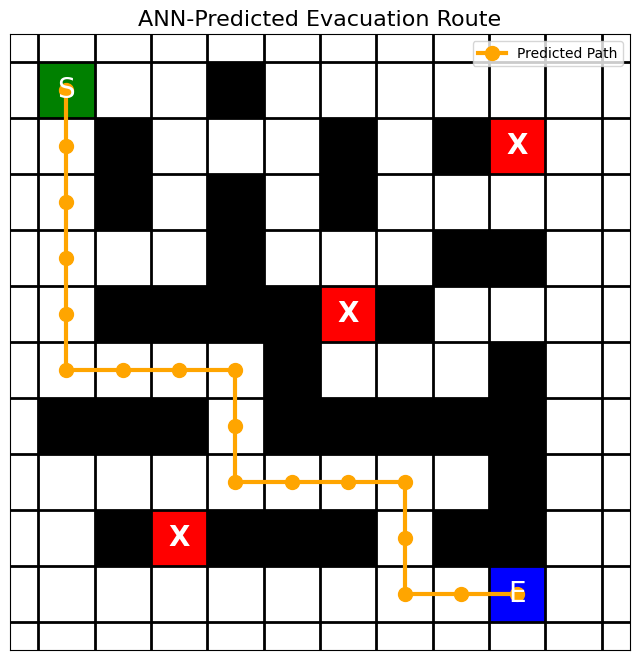

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque
import time

# --- 1. Maze Environment Setup ---

# Define the maze layout
# 0: Path, 1: Wall, 2: Start, 3: End, 4: Threat
maze_layout = [
    [2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
]

# Convert the layout to a NumPy array for easier processing
maze = np.array(maze_layout, dtype=np.float32)

# Find start and end positions
start_pos = tuple(np.argwhere(maze == 2)[0])
end_pos = tuple(np.argwhere(maze == 3)[0])

def add_threats(current_maze, num_threats=3):
    """
    Randomly adds threats to valid path locations in the maze.
    This simulates the input we would get from a YOLOv8 or EfficientDet model.
    """
    # Create a copy to avoid modifying the original maze layout
    maze_with_threats = np.copy(current_maze)
    # Get all possible path coordinates (where value is 0)
    possible_threat_locations = np.argwhere(maze_with_threats == 0)

    if len(possible_threat_locations) < num_threats:
        raise ValueError("Not enough open spaces to place all threats.")

    # Choose random indices to place the threats
    threat_indices = np.random.choice(len(possible_threat_locations), num_threats, replace=False)

    for index in threat_indices:
        threat_pos = tuple(possible_threat_locations[index])
        maze_with_threats[threat_pos] = 4 # 4 represents a threat
        print(f"Simulated Threat Detected at: {threat_pos}")

    return maze_with_threats

# --- 2. Data Generation for ANN Training ---

def generate_training_data(maze, num_samples=5000):
    """
    Generates training data by creating random mazes with threats
    and finding the optimal path using Breadth-First Search (BFS).
    BFS is a classic algorithm that guarantees the shortest path,
    providing perfect "labels" for our ANN to learn from.
    """
    print("Generating training data...")
    inputs = []
    outputs = []

    original_maze = np.copy(maze)
    # Reset start/end markers to paths for BFS logic
    original_maze[start_pos] = 0
    original_maze[end_pos] = 0

    for i in range(num_samples):
        # Add random threats for each sample to create variety
        maze_with_threats = add_threats(original_maze, np.random.randint(2, 5))

        # Use BFS to find the optimal path
        # This path will be the "ground truth" for our neural network
        queue = deque([(start_pos, [start_pos])])
        visited = {start_pos}
        path_found = None

        while queue:
            (r, c), path = queue.popleft()

            if (r, c) == end_pos:
                path_found = path
                break

            # Explore neighbors (Up, Down, Left, Right)
            for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                nr, nc = r + dr, c + dc

                # Check if the move is valid
                if (0 <= nr < maze.shape[0] and 0 <= nc < maze.shape[1] and
                    maze_with_threats[nr, nc] not in [1, 4] and # Avoid walls and threats
                    (nr, nc) not in visited):

                    visited.add((nr, nc))
                    new_path = list(path)
                    new_path.append((nr, nc))
                    queue.append(((nr, nc), new_path))

        # Create the output label: a grid where the path is marked
        if path_found:
            path_grid = np.zeros_like(maze_with_threats)
            for r, c in path_found:
                path_grid[r, c] = 1 # Mark the path

            # The input is the maze with threats
            # The output is the grid with the correct path
            inputs.append(maze_with_threats)
            outputs.append(path_grid.flatten()) # Flatten for the output layer

    print(f"Generated {len(inputs)} valid training samples.")
    return np.array(inputs), np.array(outputs)

# --- 3. Build and Train the ANN Model ---

def build_model(input_shape, output_size):
    """
    Defines the architecture of our Artificial Neural Network using Keras.
    """
    model = Sequential([
        # Input layer: flattens the 10x10 maze grid into a 1D array of 100
        Input(shape=input_shape),
        Flatten(),
        # Hidden layers: these are the "thinking" layers of the network
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),
        # Output layer: 100 neurons, one for each cell in the maze.
        # Sigmoid activation outputs a probability (0 to 1) for each cell being part of the path.
        Dense(output_size, activation='sigmoid')
    ])

    # Compile the model with an optimizer and a loss function
    # Adam is an efficient optimizer, and binary_crossentropy is used for binary classification (path/no path)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# --- 4. Visualization ---

def visualize_path(maze, path, title="Evacuation Route"):
    """
    Uses Matplotlib to draw the maze, threats, and the calculated path.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title, fontsize=16)

    # Define colors for different cell types
    colors = {
        0: 'white',   # Path
        1: 'black',   # Wall
        2: 'green',   # Start
        3: 'blue',    # End
        4: 'red'      # Threat
    }

    rows, cols = maze.shape
    ax.set_xticks(np.arange(cols + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(rows + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)
    ax.set_xticks([])
    ax.set_yticks([])

    for r in range(rows):
        for c in range(cols):
            cell_type = maze[r, c]
            ax.add_patch(patches.Rectangle((c - 0.5, r - 0.5), 1, 1, facecolor=colors.get(cell_type, 'white')))

            # Add text labels for start and end
            if cell_type == 2: ax.text(c, r, 'S', ha='center', va='center', color='white', fontsize=20)
            if cell_type == 3: ax.text(c, r, 'E', ha='center', va='center', color='white', fontsize=20)
            if cell_type == 4: ax.text(c, r, 'X', ha='center', va='center', color='white', fontsize=20, weight='bold')

    # Draw the predicted path
    if path:
        path_x = [c for r, c in path]
        path_y = [r for r, c in path]
        ax.plot(path_x, path_y, marker='o', markersize=10, color='orange', linestyle='-', linewidth=3, label="Predicted Path")

    plt.legend()
    plt.gca().invert_yaxis() # Invert y-axis to match array indexing
    plt.show()

# --- 5. Main Execution ---

if __name__ == "__main__":
    # Generate the training dataset
    # In a real application, you would save this data and load it
    # to avoid regenerating it every time.
    X_train, y_train = generate_training_data(maze, num_samples=5000)

    # Build the ANN model
    input_shape = maze.shape
    output_size = maze.size
    model = build_model(input_shape, output_size)

    # Train the model
    print("\n--- Training the ANN Model ---")
    start_time = time.time()
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
    print(f"Training finished in {time.time() - start_time:.2f} seconds.")

    # --- Test the trained model ---
    print("\n--- Testing the Model on a New Scenario ---")
    # Create a new maze with different, unseen threat locations
    test_maze = np.copy(maze)
    # Place threats
    test_maze[1, 8] = 4
    test_maze[4, 5] = 4
    test_maze[8, 2] = 4

    # Reshape the maze for the model's input
    input_for_prediction = np.expand_dims(test_maze, axis=0)

    # Get the model's prediction
    predicted_path_flat = model.predict(input_for_prediction)[0]
    predicted_path_grid = predicted_path_flat.reshape(maze.shape)

    # Extract the path from the prediction grid
    # We select cells where the model's confidence is above a threshold (e.g., 0.5)
    path_coords_raw = np.argwhere(predicted_path_grid > 0.5)

    # A simple way to order the path points:
    # Start from the beginning and find the next closest point.
    # Note: This is a simple heuristic. More robust path reconstruction
    # might be needed for complex mazes.

    if len(path_coords_raw) > 0:
        path_coords = []
        current_pos = start_pos

        # Convert raw coordinates to a list of tuples for easier processing
        remaining_points = [tuple(p) for p in path_coords_raw]

        while current_pos != end_pos and len(remaining_points) > 0:
            path_coords.append(current_pos)
            if current_pos in remaining_points:
                remaining_points.remove(current_pos)

            # Find the nearest neighbor from the remaining points
            distances = [np.linalg.norm(np.array(current_pos) - np.array(p)) for p in remaining_points]
            if not distances:
                break

            next_idx = np.argmin(distances)
            current_pos = remaining_points.pop(next_idx)

        if end_pos not in path_coords:
             path_coords.append(end_pos)

    else:
        path_coords = []
        print("Model could not find a clear path.")

    # Visualize the final result
    visualize_path(test_maze, path_coords, title="ANN-Predicted Evacuation Route")